<h1>Modified FLANN (Functional Link Artificial Neural Network) for predicting stock market index</h2>

In [1]:
# import reuired libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neural_network_functions as nn # this file is included in the project
                                      # contains all necessry functions for the working of neural network
%matplotlib inline

In [2]:
# Read data and convert it into a matrix
data=pd.read_csv("sp500.csv")
data=data.as_matrix()
data=data[1:,0].reshape(data[1:,0].shape[0],1)

In [31]:
data.shape

(4165, 5)

In [3]:
def time_series_reshape(data,num_elements):
    """
    This function stacks num_elements numbers of data instances side by side.
    This stacked data can then be used for harnessing temporal context.
    
    input:
         data: The data set to stacked
         num_elements: Number of consecutive data to be stacked side by side.
    output: Stacked data.
    
    """
  
    num_rows=data.shape[0]-num_elements+1
    new_data=np.zeros((num_rows,num_elements))
    for i in range(num_rows):
        new_data[i,:]=data[i:i+num_elements].T
    return new_data    
    

In [4]:
number_of_data_to_be_stacked=5
data=time_series_reshape(data,number_of_data_to_be_stacked) 

In [6]:
# Normalise data
max_val=np.max(data,axis=0).reshape(1,-1)
min_val=np.min(data,axis=0).reshape(1,-1)

data=(data-min_val)/(max_val-min_val) # normalisaton step
np.random.shuffle(data)               # randomise the data
x=data[:,0:number_of_data_to_be_stacked-1]
y=data[:,-1].reshape(-1,1)

In [7]:
#FLANN
#introduce non-linearity to the data and concatenate them together 
#here we introduce 2 trigonmetric and 1 exponential non-linearity to the data
x_cos=np.cos(2*np.pi*x)
x_sin=np.sin(2*np.pi*x)
x_2=x**2

#concatenate the inital data and the data on which non-linear functions were applied
x=np.concatenate((x,x_cos,x_sin,x_2),axis=1)

#train - test split
x_train=x[0:3200,:]
y_train=y[0:3200,:]
x_test=x[3201:,:]
y_test=y[3201:,:]

In [8]:

input_size=x.shape[1]
lr=0.33 #learning rate
#plt.plot(x,y)
cost_plt=[]
list_of_weight=nn.Neural_arch(x_train,y_train,3,[input_size,7,1])

# training.......
for i in range(50000):
    list_of_z,list_of_act =nn.forwardprop(x_train,list_of_weight)
    list_of_grad,cost=nn.backprop(y_train,list_of_z,list_of_act,list_of_weight)
    list_of_weight=list_of_weight-lr*list_of_grad      
    if i%1000==0:
        print("cost :{0}".format(cost))
print("cost :{0}".format(cost))

   



cost :[ 16.80355924]
cost :[ 0.00066489]
cost :[ 0.00040334]
cost :[ 0.00035264]
cost :[ 0.00032625]
cost :[ 0.00030622]
cost :[ 0.00028941]
cost :[ 0.00027493]
cost :[ 0.00026234]
cost :[ 0.0002513]
cost :[ 0.00024159]
cost :[ 0.00023301]
cost :[ 0.00022538]
cost :[ 0.00021859]
cost :[ 0.00021252]
cost :[ 0.00020706]
cost :[ 0.00020215]
cost :[ 0.00019771]
cost :[ 0.00019368]
cost :[ 0.00019001]
cost :[ 0.00018666]
cost :[ 0.00018359]
cost :[ 0.00018076]
cost :[ 0.00017816]
cost :[ 0.00017574]
cost :[ 0.00017351]
cost :[ 0.00017142]
cost :[ 0.00016948]
cost :[ 0.00016766]
cost :[ 0.00016596]
cost :[ 0.00016436]
cost :[ 0.00016285]
cost :[ 0.00016143]
cost :[ 0.00016008]
cost :[ 0.00015881]
cost :[ 0.0001576]
cost :[ 0.00015645]
cost :[ 0.00015536]
cost :[ 0.00015432]
cost :[ 0.00015332]
cost :[ 0.00015237]
cost :[ 0.00015146]
cost :[ 0.00015059]
cost :[ 0.00014975]
cost :[ 0.00014895]
cost :[ 0.00014818]
cost :[ 0.00014744]
cost :[ 0.00014672]
cost :[ 0.00014603]
cost :[ 0.00014537]
c

In [9]:
#Check the model on unseen test data
k,result=nn.forwardprop(x_test,list_of_weight)

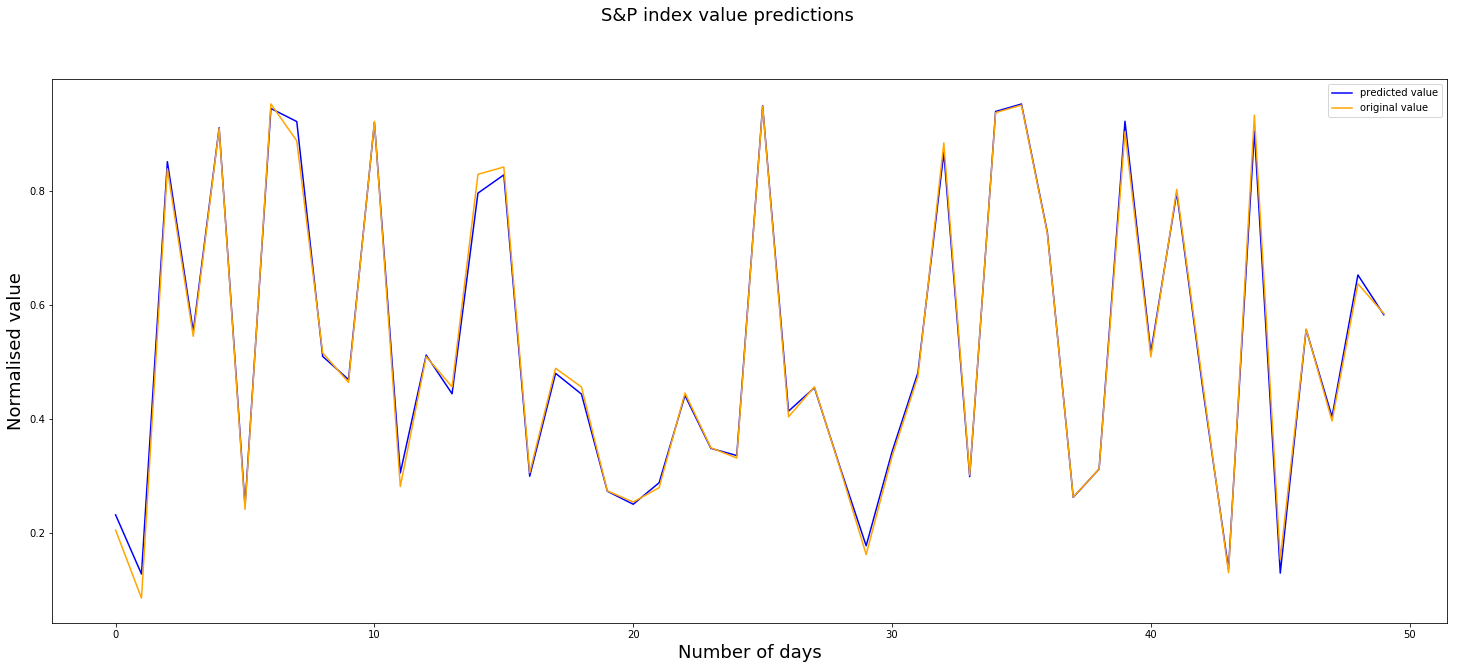

In [29]:

figure=plt.figure(figsize=(25,10))
plt.plot(result[-1][0:50],color='blue')
plt.plot(y_test[0:50],color ='orange')
plt.xlabel('Number of days', fontsize=18)
plt.ylabel('Normalised value', fontsize=18)
plt.suptitle('S&P index value predictions', fontsize=18)
plt.gca().legend(('predicted value','original value'))
figure.savefig('S&P index value predictions_50_days.jpg')

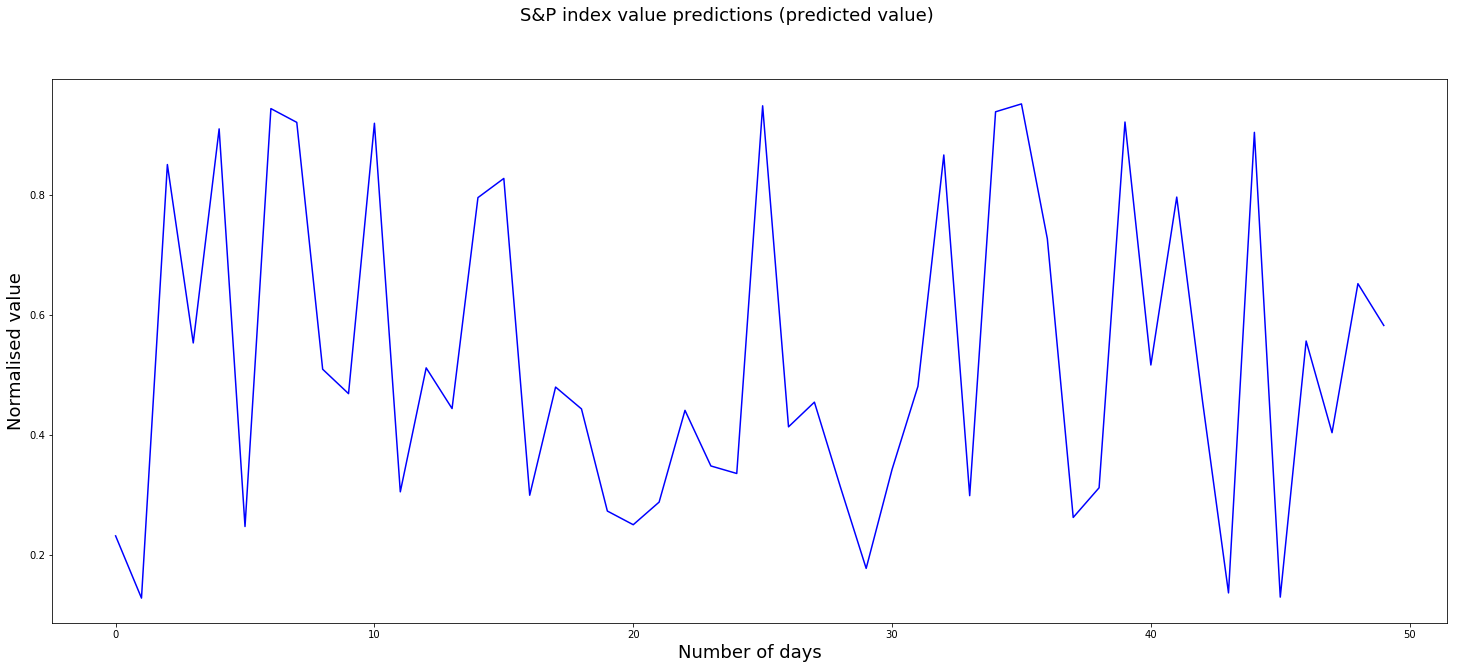

In [19]:
plt.figure(figsize=(25,10))
plt.plot(result[-1][0:50],color='blue')
plt.xlabel('Number of days', fontsize=18)
plt.ylabel('Normalised value', fontsize=18)
plt.suptitle('S&P index value predictions (predicted value)', fontsize=18)

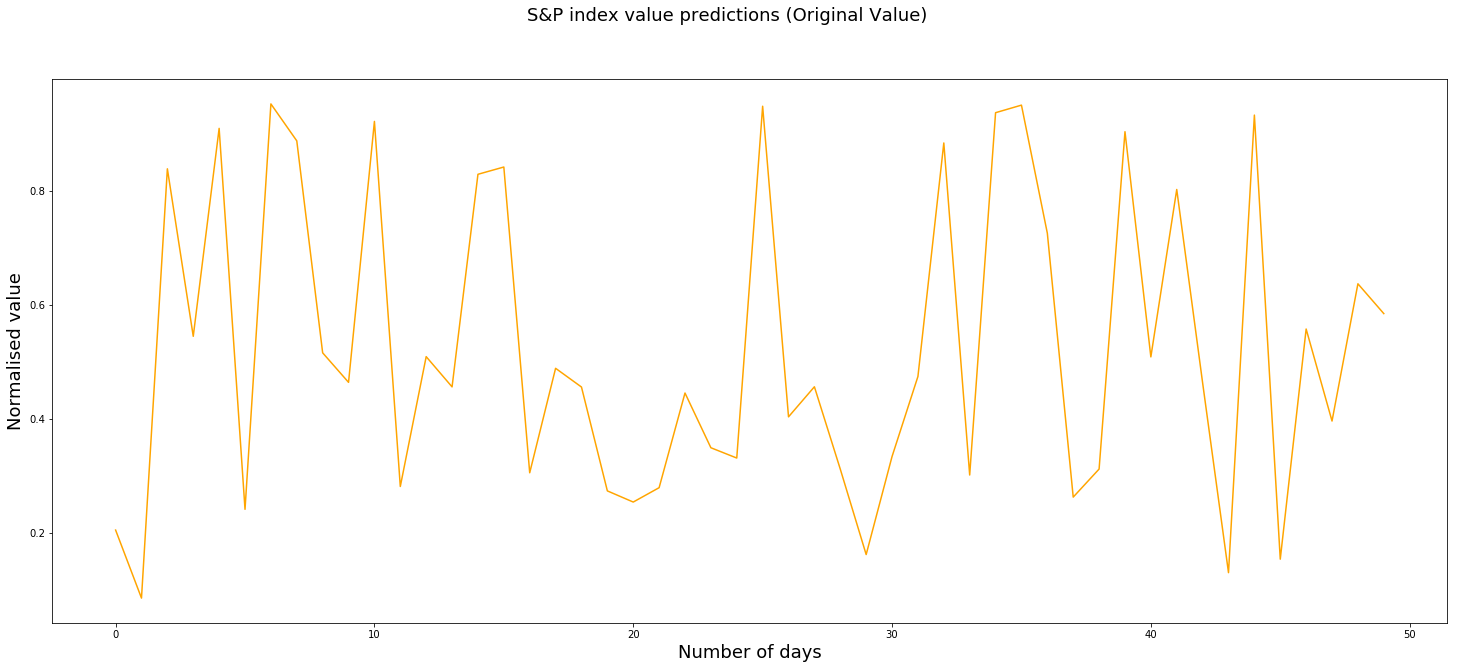

In [22]:
plt.figure(figsize=(25,10))
plt.plot(y_test[0:50],color ='orange')
plt.xlabel('Number of days', fontsize=18)
plt.ylabel('Normalised value', fontsize=18)
plt.suptitle('S&P index value predictions (Original Value)', fontsize=18)

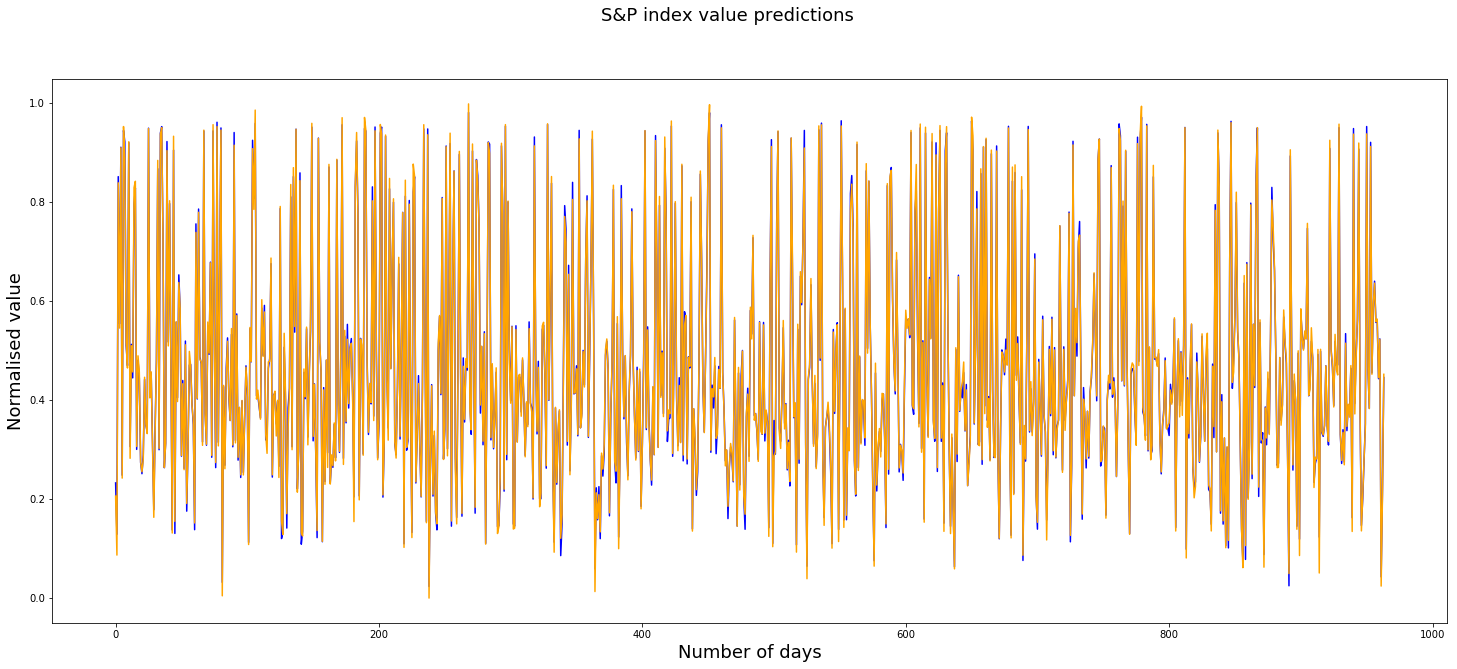

In [21]:
plt.figure(figsize=(25,10))
plt.plot(result[-1],color='blue')
plt.plot(y_test,color ='orange')
plt.xlabel('Number of days',fontsize=18)
plt.ylabel('Normalised value', fontsize=18)
plt.suptitle('S&P index value predictions', fontsize=18)